# Effects on training on Beta
A simple notebook to test how we should defined the beta in the artificial matrix. The relevant question is whether each entry should be proportional to whether the pattern appears on the sequence or not or if it should be proportional to how many times the pattern apperas on the pattern

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '5273391d742b9de04a97883c9765403b38ecfe03'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

## Training of a simple sequence

In [3]:
from network import BCPNNFast, NetworkManager, Protocol
from plotting_functions import plot_winning_pattern, plot_weight_matrix

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 'beta', 'p_post']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 3.0
inter_pulse_interval = 0.0
epochs = 6

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns, k_inner=False)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
n_patterns = 19
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True, values_to_save_epoch=['w'])

('epochs', 0)
('epochs', 1)
('epochs', 2)
('epochs', 3)
('epochs', 4)
('epochs', 5)


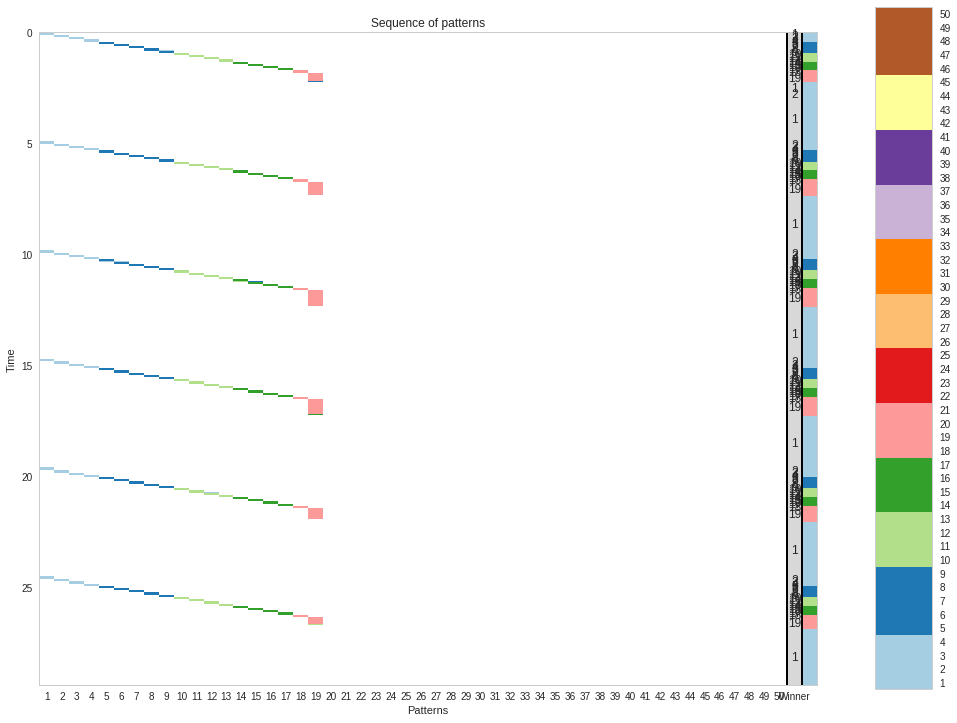

In [5]:
plot_winning_pattern(manager)

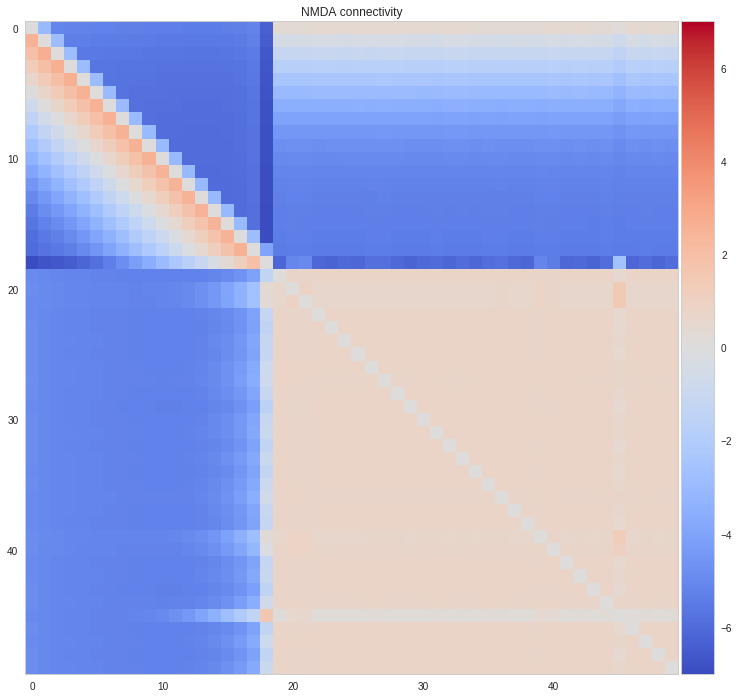

In [6]:
plot_weight_matrix(nn, one_hypercolum=True)

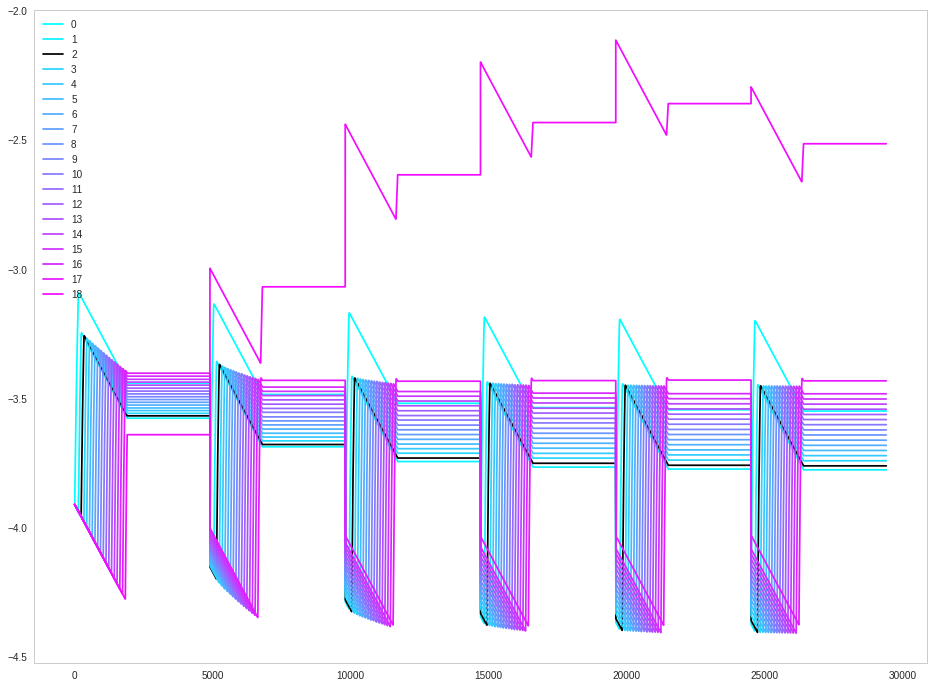

In [8]:
beta = manager.history['beta']
n_saved = len(patterns_indexes)
time = np.arange(dt, manager.T_total, dt)

cm = matplotlib.cm.cool
norm = matplotlib.colors.Normalize(vmin=0, vmax=n_saved)
exception = (0, 0, 0, 1)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for pattern in patterns_indexes:
    if pattern == 2:
        ax.plot(beta[:, pattern], color=exception, label=str(pattern))
    else:
        ax.plot(beta[:, pattern], color=cm(norm(pattern)), label=str(pattern))


ax.legend();
    

We can see that besides the frontier effects (the first and the last pattern) after the first epoch the beta values for the patterns are organised in **increasing order** that is, the first patterns have the smaller values (more negative) of beta. Which means that **will favor the natural recall of the latter patterns** or thanks to beta the latter paterns will be more stable. 

After the first epoch thought this order dissappears if the network is small enough or the number of patterns that participate in the sequence is small compared to the size of the network

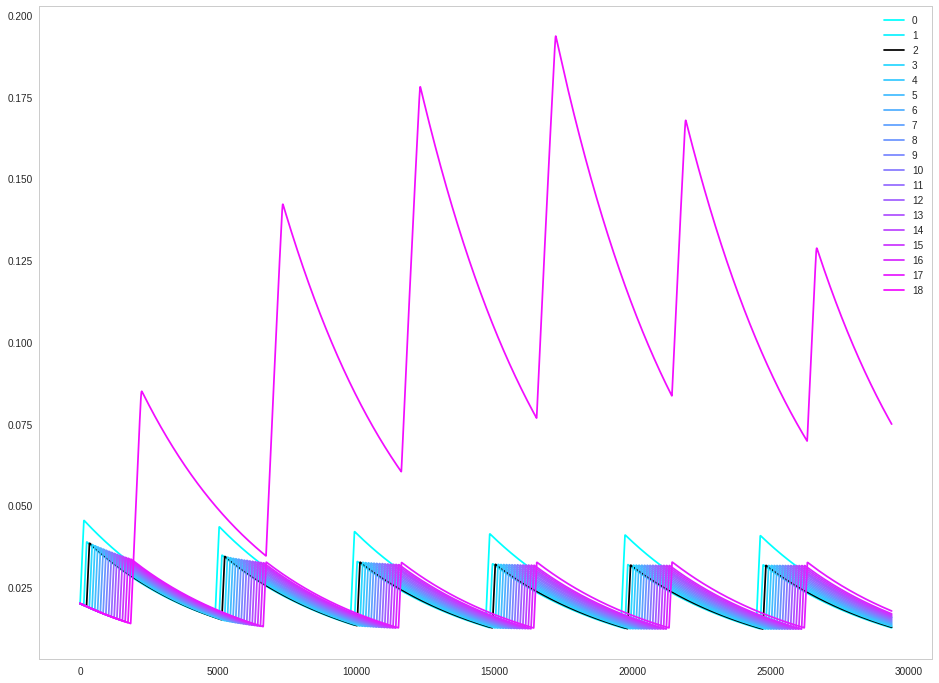

In [9]:
p = manager.history['p_post']
time = np.arange(dt, manager.T_total, dt)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cm = matplotlib.cm.cool
norm = matplotlib.colors.Normalize(vmin=0, vmax=n_saved)
exception = (0, 0, 0, 1)

for pattern in patterns_indexes:
    if pattern == 2:
        ax.plot(p[:, pattern], color=exception, label=str(pattern))
    else:
        ax.plot(p[:, pattern], color=cm(norm(pattern)), label=str(pattern))

ax.legend();
    

## Cross-over sequence

In [10]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 'beta', 'p_post']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 3.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns, k_inner=False)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
n_patterns = 10
chain = [[0, 1, 2, 3, 4, 5, 6, 7, 8], [10, 11, 2, 13, 14, 15, 16, 17, 18]]
protocol.cross_protocol(chain, training_time=training_time,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True, values_to_save_epoch=['w'])

('epochs', 0)
('epochs', 1)
('epochs', 2)


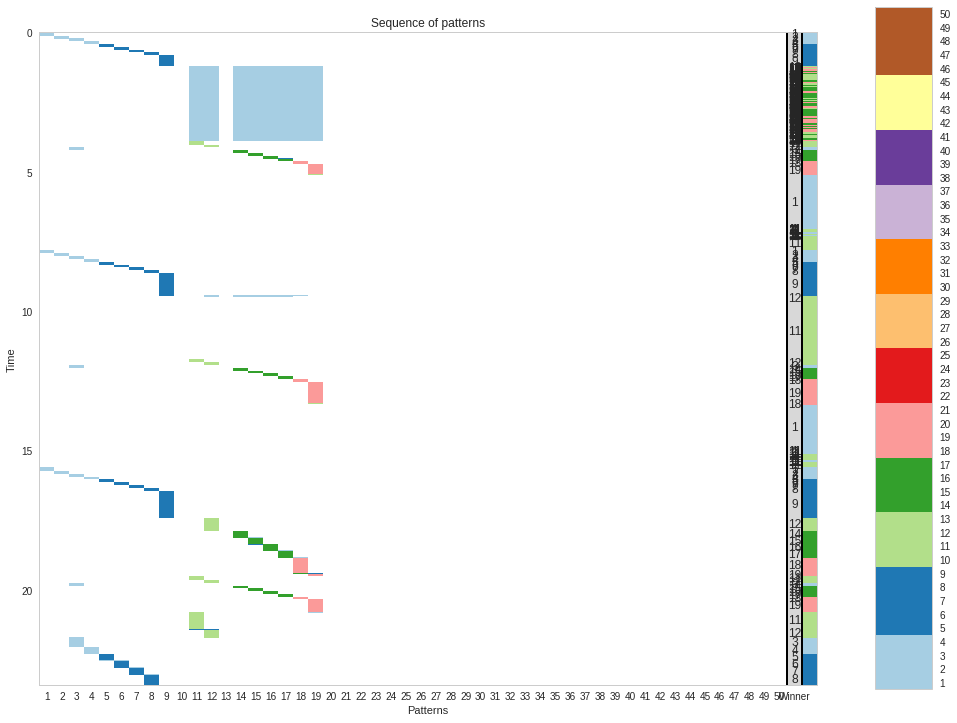

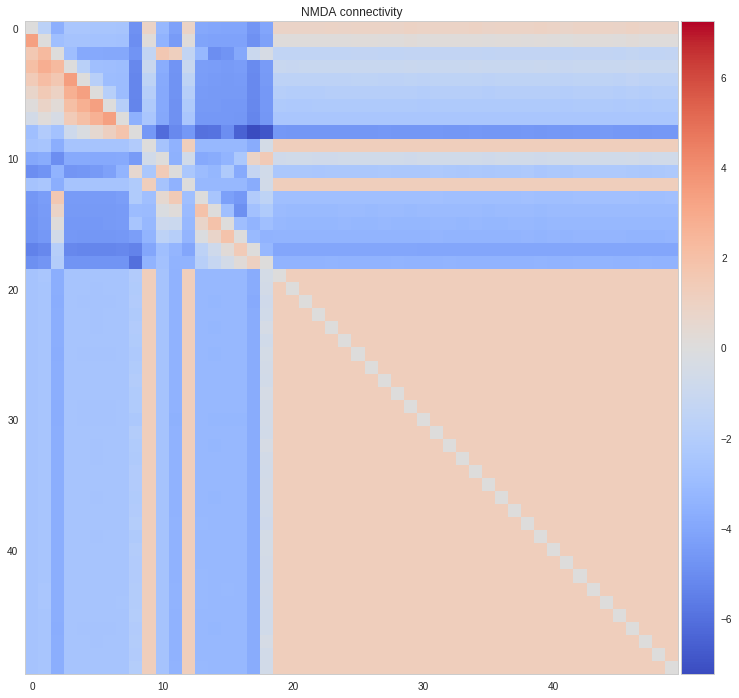

In [11]:
plot_winning_pattern(manager)
plot_weight_matrix(nn, one_hypercolum=True)

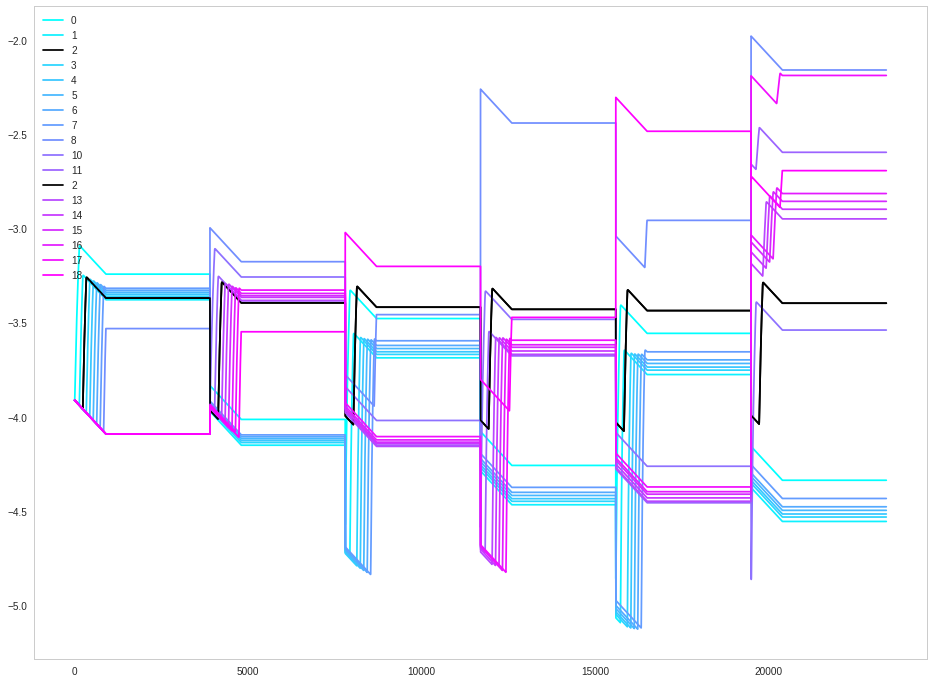

In [12]:
patterns_indexes = [pattern for sequence in chain for pattern in sequence]
n_saved = len(patterns_indexes)
# patterns_indexes = chain[1]

beta = manager.history['beta']

time = np.arange(dt, manager.T_total, dt)

cm = matplotlib.cm.cool
norm = matplotlib.colors.Normalize(vmin=0, vmax=n_saved)
exception = (0, 0, 0, 1)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for pattern in patterns_indexes:
    if pattern == 2:
        ax.plot(beta[:, pattern], color=exception, label=str(pattern))
    else:
        ax.plot(beta[:, pattern], color=cm(norm(pattern)), label=str(pattern))

ax.legend();

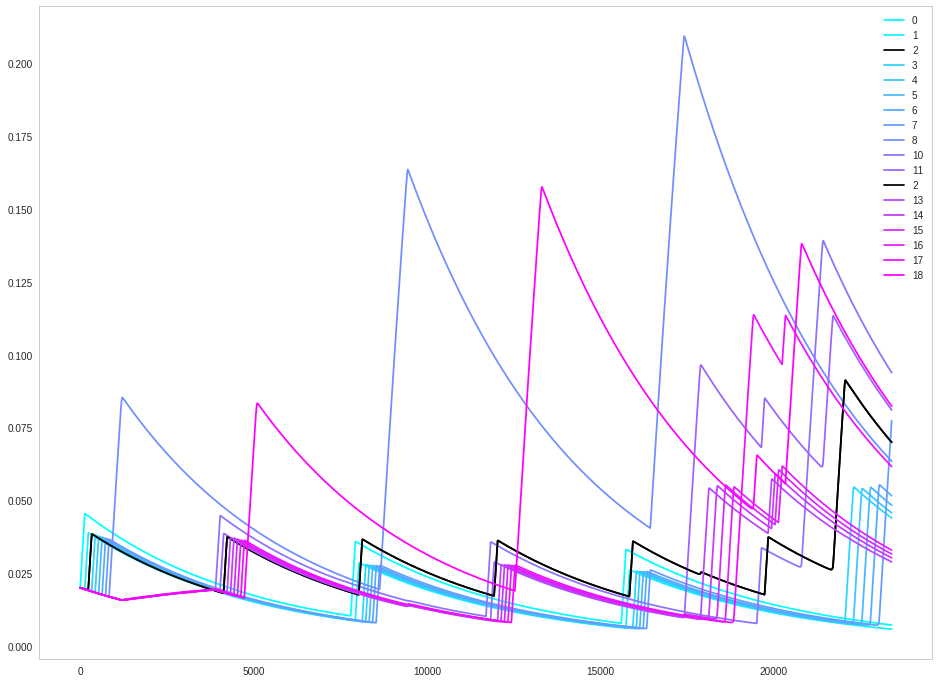

In [13]:
patterns_indexes = [pattern for sequence in chain for pattern in sequence]
n_saved = len(patterns_indexes)
p = manager.history['p_post']

time = np.arange(dt, manager.T_total, dt)

cm = matplotlib.cm.cool
norm = matplotlib.colors.Normalize(vmin=0, vmax=n_saved)
exception = (0, 0, 0, 1)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for pattern in patterns_indexes:
    if pattern == 2:
        ax.plot(p[:, pattern], color=exception, label=str(pattern))
    else:
        ax.plot(p[:, pattern], color=cm(norm(pattern)), label=str(pattern))
ax.legend();

In [14]:
patterns_indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 2, 13, 14, 15, 16, 17, 18]

#### Git machinery

In [15]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])